In [29]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer



In [16]:
df = pd.read_csv('/Users/vivianjames/Desktop/Zomato-data- (2).csv')

df.head()
df.info()

df.describe()






<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


,votes,approx_cost(for two people)
count,148.000000,148.000000
mean,264.810811,418.243243
std,653.676951,223.085098
min,0.000000,100.000000
25%,6.750000,200.000000
50%,43.500000,400.000000
75%,221.750000,600.000000
max,4884.000000,950.000000


<Axes: >

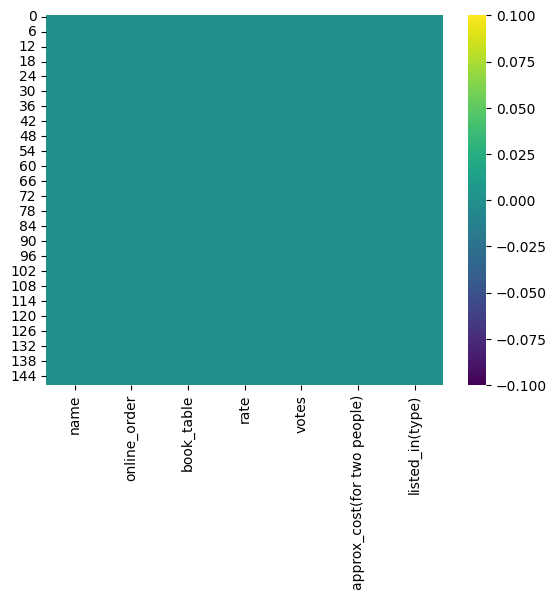

In [17]:
df.isnull().sum() # checking out for missing values 
sns.heatmap(df.isnull(), cmap = 'viridis') # visualize missing values
# Now handling all the missing data, if in case there is anything to be done !!



In [18]:
# going in deep for the missing values
# things to be done..

# like, cal. total missing values per column, percentage of the mssing values

# then combining them.. we get what we finally want.

missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum()/ len(df)) * 100
missing_df = pd.DataFrame({"Missing Values": missing_values, 'Percentage (%)': missing_percentage})
missing_df = missing_df[missing_df["Missing Values"]> 0].sort_values(by ='Percentage (%)', ascending =False)

missing_df

,Missing Values,Percentage (%)


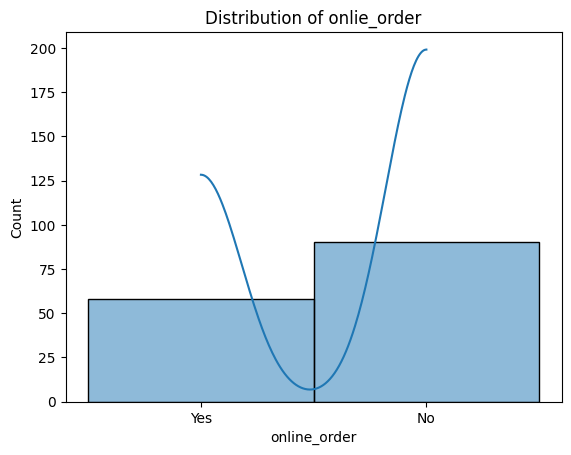

In [19]:
sns.histplot(df['online_order'], kde =True)
plt.title('Distribution of onlie_order')
plt.show()

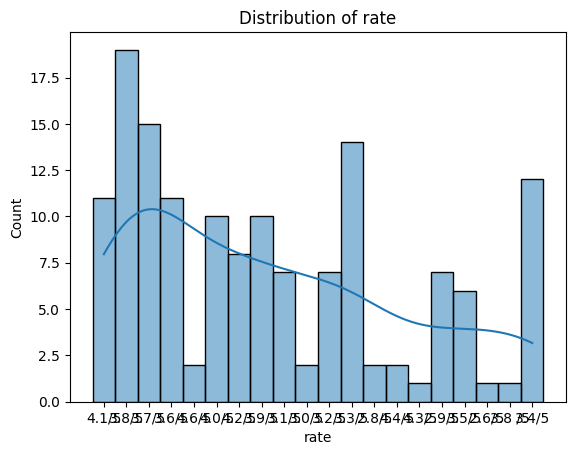

In [20]:
sns.histplot(df['rate'], kde = True)
plt.title('Distribution of rate')
plt.show()

# BASICALLY FOR NUMERICAL COLUMNS

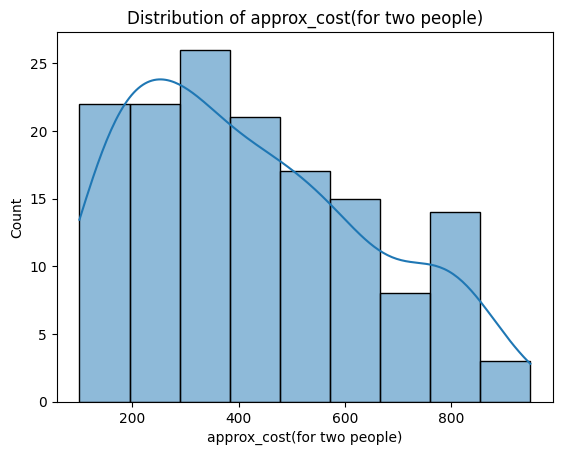

In [21]:
sns.histplot(df['approx_cost(for two people)'], kde = True)
plt.title('Distribution of approx_cost(for two people)')
plt.show()

In [22]:
df['name'].value_counts() # this was for, "how many unique values are there ? "

# BASICALLY FOR CATEGORICAL COLUMNS

name
San Churro Cafe               2
CAFE NOVA                     2
Onesta                        2
Jalsa                         1
Kotian Karavali Restaurant    1
                             ..
Kitchen Garden                1
Hotboxit                      1
Domino's Pizza                1
McDonald's                    1
Vijayalakshmi                 1
Name: count, Length: 145, dtype: int64

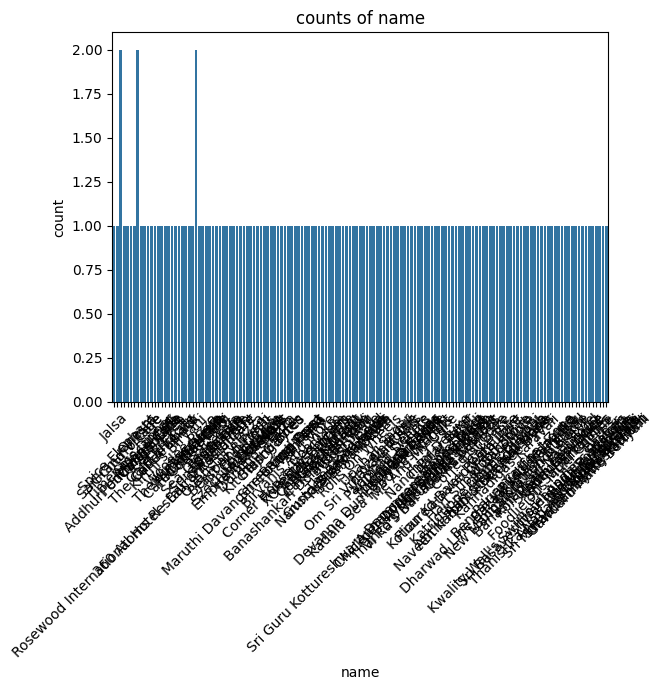

In [23]:
# now visualizing it, the above one waht we found !!
sns.countplot(x ="name", data = df)
plt.title('counts of name')
plt.xticks(rotation =45 )
plt.show()

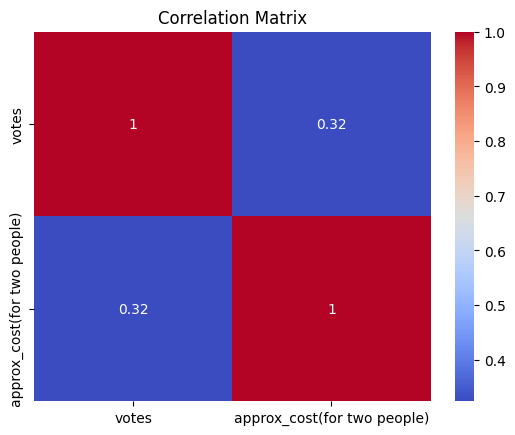

In [24]:
# NOW TURN OF, CORRELATION MATRIX, IS some features are co related 

plt.Figure(figsize = (12,9))
numeric_df =df.select_dtypes(include = ['int64', 'float64'])
sns.heatmap (numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [25]:
# now enhancing the correlation matrix, as to getting into it,,
# and telling out the top corr pairs in it !!

corr_matrix = numeric_df.corr()
high_corr_pairs = corr_matrix.unstack().sort_values(ascending = False)


print (high_corr_pairs[high_corr_pairs < 1]. head (10))

votes                        approx_cost(for two people)    0.324372
approx_cost(for two people)  votes                          0.324372
dtype: float64


<Axes: >

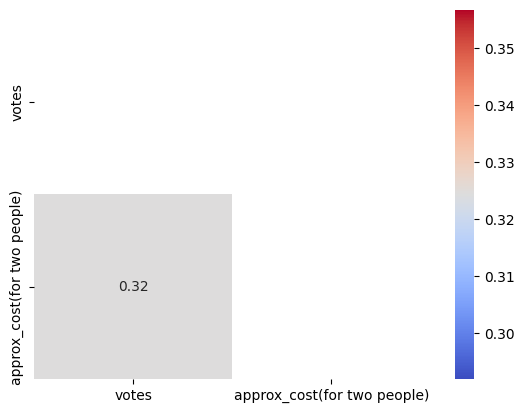

In [26]:
# use of MASK IN THE correlation matrix

mask = np.triu(np.ones_like(corr_matrix, dtype = bool))
sns.heatmap(corr_matrix, mask=mask, annot = True, cmap = 'coolwarm')


# showing only the lower triangle and hiding the upper half !!

In [27]:
# doing some OUTLIER DETECTION THINGS HERE, for more and more accuracy 

# and also handling it !

# so for that  WE USE "" BOXPLOTS "", to check the extreme values present in the dataset


Q1 = df['votes'].quantile(0.25)
Q3 = df['votes'].quantile(0.75)

IQR = Q3 - Q1 
outliers = df[(df['votes'] < (Q1 - 1.5*IQR))]

print(outliers)




Empty DataFrame
Columns: [name, online_order, book_table, rate, votes, approx_cost(for two people), listed_in(type)]
Index: []


In [28]:
Q1 = df['online_order'].quantile(0.25)
Q3 = df['online_order'].quantile(0.75)

IQR = Q3 - Q1 
outliers = df[(df['online_order'] < (Q1 - 1.5*IQR))]

print(outliers)



# HERE IN YOU GOT A ERROR BECAUSE THE COLUMN YOU AR USING IS NOT NUMERICAL ITS STRING



TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [ ]:
Q1 = df['rate'].quantile(0.25)
Q3 = df['rate'].quantile(0.75)

IQR = Q3 - Q1 
outliers = df[(df['rate'] < (Q1 - 1.5*IQR))]

print(outliers)


# SOmeTIMES COLUMN LIKE RATE CAN ALSO CONSIST VALUES LIKE 'NEW ITEM', ' / ' ETC
# THATS WHY SHOWING ERROR 


TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [ ]:
Q1 = df['approx_cost(for two people)'].quantile(0.25)
Q3 = df['approx_cost(for two people)'].quantile(0.75)

IQR = Q3 - Q1 
outliers = df[(df['approx_cost(for two people)'] < (Q1 - 1.5*IQR))]

print(outliers)


Empty DataFrame
Columns: [votes, approx_cost(for two people), rate_2.8/5, rate_2.9/5, rate_3.0/5, rate_3.1/5, rate_3.2/5, rate_3.3/5, rate_3.4/5, rate_3.5/5, rate_3.6/5, rate_3.7/5, rate_3.8 /5, rate_3.8/5, rate_3.9/5, rate_4.0/5, rate_4.1/5, rate_4.2/5, rate_4.3/5, rate_4.4/5, rate_4.6/5, name_Aarush's Food Plaza, name_Addhuri Udupi Bhojana, name_Amma - Manae, name_Anna Kuteera, name_Annapooraneshwari Mess, name_Aramane Donne Biriyani, name_Atithi Point Ande Ka Funda, name_Ayda Persian Kitchen, name_Banashankari Donne Biriyani, name_Banashankari Nati Style, name_Behrouz Biryani, name_Beijing Bites, name_Bengaluru Coffee House, name_Biryanis And More, name_Burger King, name_CAFE NOVA, name_Caf-Eleven, name_Cafe Coffee Day, name_Cafe Shuffle, name_Cafe Vivacity, name_Cake Bite, name_Cake of the Day, name_Cakes & Slices, name_Catch-up-ino, name_Chaatimes, name_Chatar Patar, name_Chickpet Donne Biryani House, name_Chill Out, name_Chinese Kitchen, name_Coffee Bytes, name_Coffee Shopee, nam

In [ ]:

import pandas as pd

# Check column names
print(df.columns)  # First step to ensure actual names

#  Fix column names (remove special characters or spaces if needed)
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('[^a-z0-9_]', '', regex=True)








Index(['name', 'online_order', 'book_table', 'rate', 'votes',
       'approx_cost(for two people)', 'listed_in(type)'],
      dtype='object')


In [ ]:
print(df.columns.tolist())

['votes', 'approx_cost(for two people)', 'rate_2.8/5', 'rate_2.9/5', 'rate_3.0/5', 'rate_3.1/5', 'rate_3.2/5', 'rate_3.3/5', 'rate_3.4/5', 'rate_3.5/5', 'rate_3.6/5', 'rate_3.7/5', 'rate_3.8 /5', 'rate_3.8/5', 'rate_3.9/5', 'rate_4.0/5', 'rate_4.1/5', 'rate_4.2/5', 'rate_4.3/5', 'rate_4.4/5', 'rate_4.6/5', "name_Aarush's Food Plaza", 'name_Addhuri Udupi Bhojana', 'name_Amma - Manae', 'name_Anna Kuteera', 'name_Annapooraneshwari Mess', 'name_Aramane Donne Biriyani', 'name_Atithi Point Ande Ka Funda', 'name_Ayda Persian Kitchen', 'name_Banashankari Donne Biriyani', 'name_Banashankari Nati Style', 'name_Behrouz Biryani', 'name_Beijing Bites', 'name_Bengaluru Coffee House', 'name_Biryanis And More', 'name_Burger King', 'name_CAFE NOVA', 'name_Caf-Eleven', 'name_Cafe Coffee Day', 'name_Cafe Shuffle', 'name_Cafe Vivacity', 'name_Cake Bite', 'name_Cake of the Day', 'name_Cakes & Slices', 'name_Catch-up-ino', 'name_Chaatimes', 'name_Chatar Patar', 'name_Chickpet Donne Biryani House', 'name_Chi

In [ ]:
print(df.columns)

Index(['votes', 'approx_cost(for two people)', 'rate_2.8/5', 'rate_2.9/5',
       'rate_3.0/5', 'rate_3.1/5', 'rate_3.2/5', 'rate_3.3/5', 'rate_3.4/5',
       'rate_3.5/5',
       ...
       'name_Vi Ra's Bar and Restaurant', 'name_Vijayalakshmi',
       'name_Village Café', 'name_Wamama', 'name_Wood Stove',
       'name_Woodee Pizza', 'name_XO Belgian Waffle', 'listed_in(type)_Cafes',
       'listed_in(type)_Dining', 'listed_in(type)_other'],
      dtype='object', length=168)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Columns: 168 entries, votes to listed_in(type)_other
dtypes: bool(166), int64(2)
memory usage: 26.4 KB


Text(0.5, 0, 'Type of restaurant')

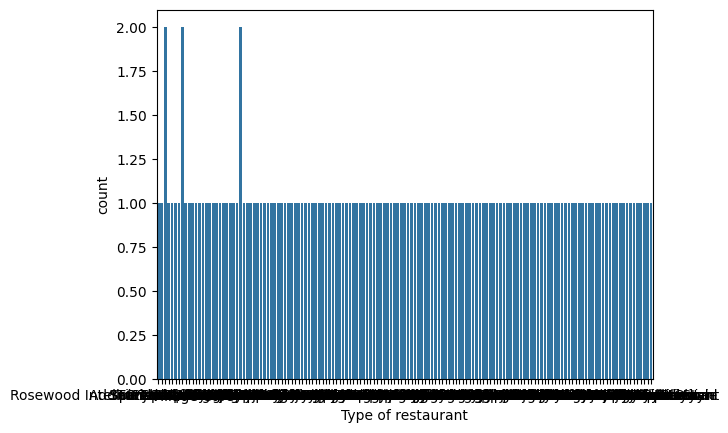

In [ ]:
# once again going through the listed in type column.. how is it?

sns.countplot(x=df ['name'])
plt.xlabel("Type of restaurant")

Text(0.5, 0, 'Type of restaurant')

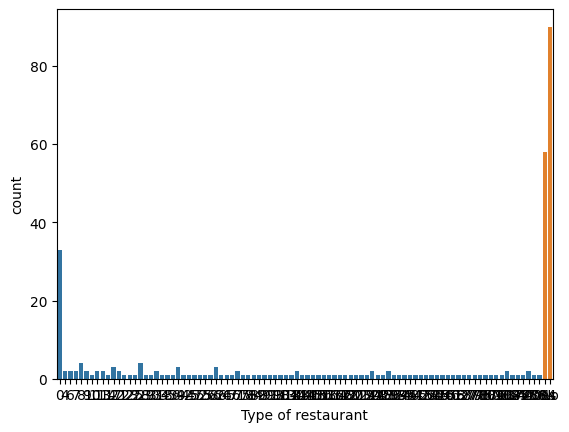

In [ ]:
# for different columns as well ...

sns.countplot(x=df ['votes'])
plt.xlabel("Type of restaurant")

sns.countplot(x=df ['online_order'])
plt.xlabel("Type of restaurant")

In [ ]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('[^a-z0-9_]', '', regex=True)


Text(0.5, 0, 'Type of restaurant')

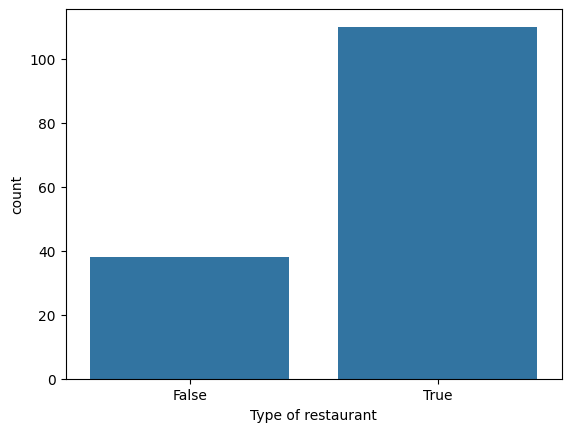

In [ ]:
sns.countplot(x=df ['listed_intype_dining'])
plt.xlabel("Type of restaurant")

In [ ]:
print(df.columns)


Index(['online_order', 'book_table', 'rate', 'votes',
       'approx_costfor_two_people', 'name_aarushs_food_plaza',
       'name_addhuri_udupi_bhojana', 'name_amma__manae', 'name_anna_kuteera',
       'name_annapooraneshwari_mess',
       ...
       'name_vi_ras_bar_and_restaurant', 'name_vijayalakshmi',
       'name_village_caf', 'name_wamama', 'name_wood_stove',
       'name_woodee_pizza', 'name_xo_belgian_waffle', 'listed_intype_cafes',
       'listed_intype_dining', 'listed_intype_other'],
      dtype='object', length=152)


In [ ]:

# Step 1: Convert Yes/No columns
df['online_order'] = df['online_order'].map({'Yes': 1, 'No': 0})
df['book_table'] = df['book_table'].map({'Yes': 1, 'No': 0})

# Step 2: Encode categorical columns
df = pd.get_dummies(df, columns=['name_wood_stove', 'listed_intype_dining'], drop_first=True)


In [ ]:
print(df.columns.tolist())


['online_order', 'book_table', 'rate', 'votes', 'approx_costfor_two_people', 'name_aarushs_food_plaza', 'name_addhuri_udupi_bhojana', 'name_anna_kuteera', 'name_annapooraneshwari_mess', 'name_aramane_donne_biriyani', 'name_atithi_point_ande_ka_funda', 'name_ayda_persian_kitchen', 'name_banashankari_donne_biriyani', 'name_banashankari_nati_style', 'name_behrouz_biryani', 'name_beijing_bites', 'name_bengaluru_coffee_house', 'name_biryanis_and_more', 'name_burger_king', 'name_cafe_nova', 'name_cafeleven', 'name_cafe_coffee_day', 'name_cafe_shuffle', 'name_cafe_vivacity', 'name_cake_bite', 'name_cake_of_the_day', 'name_cakes__slices', 'name_catchupino', 'name_chaatimes', 'name_chatar_patar', 'name_chickpet_donne_biryani_house', 'name_chill_out', 'name_chinese_kitchen', 'name_coffee_bytes', 'name_coffee_shopee', 'name_coffee_tindi', 'name_corner_house_ice_cream', 'name_cuppa', 'name_darbar', 'name_darkolates', 'name_dessert_rose', 'name_devanna_dum_biriyani_centre', 'name_dharwad_line_bazaa

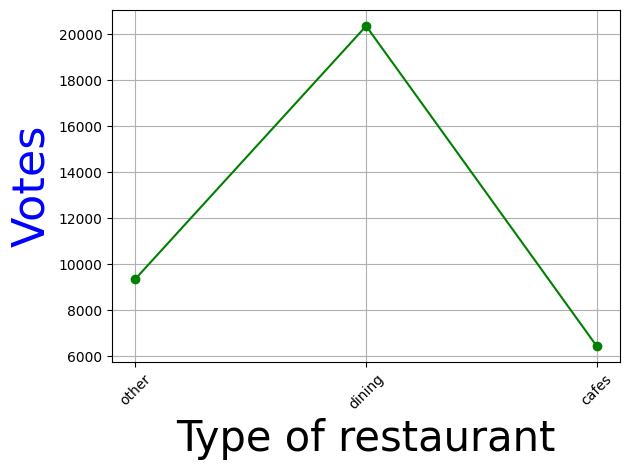

In [ ]:
import matplotlib.pyplot as plt

# Select only columns that are from 'listed_in(type)' dummy encoding
dummy_cols = [col for col in df.columns if col.startswith('listed_intype_')]

# Multiply each dummy column by 'votes' to get total votes per type
votes_by_type = {col.replace('listed_intype_', '').replace('_True', ''): (df[col] * df['votes']).sum() for col in dummy_cols}

# Convert to DataFrame for plotting
result = pd.DataFrame(list(votes_by_type.items()), columns=['Type', 'Votes'])

# Plot
plt.plot(result['Type'], result['Votes'], c='green', marker='o')
plt.xlabel('Type of restaurant', c='black', size=30)
plt.ylabel('Votes', c='blue', size=32)
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()




#  SO DINING RESTAURANT IS PREFERRED BY LOT OF PEOPLE!!


In [ ]:
# Get the row with max votes
max_votes = df['votes'].max()
max_row = df[df['votes'] == max_votes]

# Find which name column has value 1 in that row
restaurant_name_columns = [col for col in df.columns if col.startswith('name_') and df[col].nunique() == 2]
restaurant_names = max_row[restaurant_name_columns].iloc[0]
restaurant_with_max_votes = [col.replace('name_', '').replace('_', ' ') for col in restaurant_names[restaurant_names == 1].index]

print('Restaurant(s) with the maximum votes:')
for name in restaurant_with_max_votes:
    print(name)


Restaurant(s) with the maximum votes:
empire restaurant


<Axes: xlabel='online_order', ylabel='count'>

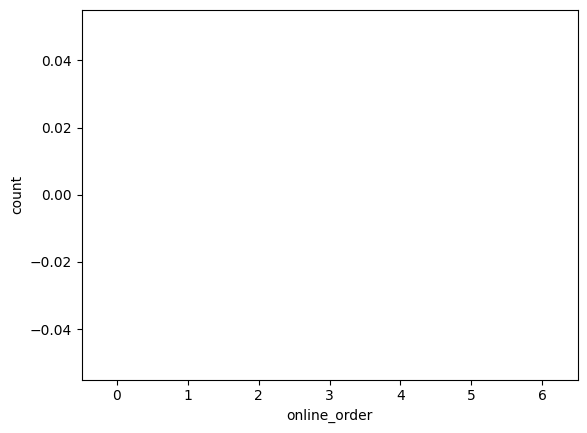

In [ ]:

sns.countplot(x=df['online_order'])

In [ ]:
print(df.columns.tolist())


['online_order', 'book_table', 'rate', 'votes', 'approx_costfor_two_people', 'name_aarushs_food_plaza', 'name_addhuri_udupi_bhojana', 'name_anna_kuteera', 'name_annapooraneshwari_mess', 'name_aramane_donne_biriyani', 'name_atithi_point_ande_ka_funda', 'name_ayda_persian_kitchen', 'name_banashankari_donne_biriyani', 'name_banashankari_nati_style', 'name_behrouz_biryani', 'name_beijing_bites', 'name_bengaluru_coffee_house', 'name_biryanis_and_more', 'name_burger_king', 'name_cafe_nova', 'name_cafeleven', 'name_cafe_coffee_day', 'name_cafe_shuffle', 'name_cafe_vivacity', 'name_cake_bite', 'name_cake_of_the_day', 'name_cakes__slices', 'name_catchupino', 'name_chaatimes', 'name_chatar_patar', 'name_chickpet_donne_biryani_house', 'name_chill_out', 'name_chinese_kitchen', 'name_coffee_bytes', 'name_coffee_shopee', 'name_coffee_tindi', 'name_corner_house_ice_cream', 'name_cuppa', 'name_darbar', 'name_darkolates', 'name_dessert_rose', 'name_devanna_dum_biriyani_centre', 'name_dharwad_line_bazaa

In [ ]:
print(df.columns)


Index(['name', 'online_order', 'book_table', 'rate', 'votes',
       'approx_cost(for two people)', 'listed_in(type)'],
      dtype='object')


In [ ]:
pivot_table = df.pivot_table(index='listed_in_type', columns='online_order', aggfunc='size', fill_value=0)

if pivot_table.empty:
    print("Pivot table is empty. Check your data in 'listed_in_type' or 'online_order'.")
else:
    sns.heatmap(pivot_table, annot=True, cmap='viridis', fmt='d')
    plt.title('Heatmap')
    plt.xlabel('Online Order')
    plt.ylabel('Listed In (Type)')
    plt.show()


Pivot table is empty. Check your data in 'listed_in_type' or 'online_order'.


In [ ]:
print(df['listed_in(type)'].dropna().unique())


['Buffet' 'Cafes' 'other' 'Dining']


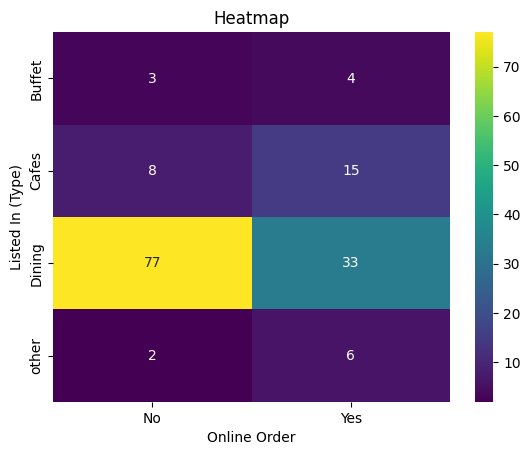

In [ ]:
pivot_table = df.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)

sns.heatmap(pivot_table, annot=True, cmap='viridis', fmt='d')
plt.title('Heatmap')
plt.xlabel('Online Order')
plt.ylabel('Listed In (Type)')
plt.show()


In [ ]:
# now major processes like dropping out not so imp columns 

X = df.drop(['online_order', 'name', 'listed_in(type)'], axis=1)  # drop name dummies if too many
y = df['online_order']


In [ ]:
# FURTHER WE WILL DO TRAIN TEST SPLIT FOR TESTING OUT THE MODEL WE ARE PREPARIN OUT !!

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# NOW we will try out some simple models for practice purpose only

# LIKE LOGISTICS REGRESSION, LINEAR, XGBOOST, ETC



from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


ValueError: could not convert string to float: 'No'

In [ ]:
## above i got the error as -- string to float not possible for logistics regression 


# so try to first encode and convert the data into numeric terms 

print(X_train.select_dtypes(include='object').columns)


Index(['book_table', 'rate'], dtype='object')


In [ ]:
X = pd.get_dummies(X, drop_first=True)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
## NOW MODEL TRAINING -- RETRYINH 

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [ ]:
#  now evaluating accuracy -- most IMPORTANT 

from sklearn.metrics import accuracy_score, classification_report
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
